In [1]:
# libary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.simplefilter('ignore')

## About case study

<b>About Aerofit</b>

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as <b>treadmills, exercise bikes, gym equipment, and fitness accessories </b> to cater to the needs of all categories of people.


### Defining the Problem

<b> Problem Statement</b>

 identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1.Perform <b> descriptive analytics </b> to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2.For each AeroFit treadmill product, construct <b>two-way contingency tables</b> and compute all <b> conditional and marginal probabilities along with their insights/impact on the business.</b>

In [2]:
df = pd.read_csv("aerofit.csv")
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Dataset characterstics

#### Dataset contains following columns
* <b>Product Purchased </b>:KP281, KP481, or KP781 threadmill purchased by customer
* <b>Age </b>:In years
* <b>Gender </b>:Male/Female
* <b>Education </b>:In years
* <b>MaritalStatus </b>:Single or partnered
* <b>Usage </b>:The average number of times the customer plans to use the treadmill each week.
* <b>Income </b>:Annual income (in $)
* <b>Fitness </b>:Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* <b>Miles </b>:The average number of miles the customer expects to walk/run each week

In [3]:
#shape of data
df.shape

(180, 9)

Dataset contains 180 rows and 9 columns

In [4]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* Product, Gender and MaritalStatus are Object (Str)
* Age, Eductaion, Usage, Fitness, Income, Miles (Int64)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Descriptive Analysis

* Total count of all columns is 180.
* Age : The mean age of the customer is 28.Half the customer's mean age is 26.
* Education : Mean Education is 15, Minimum is 12 and Maximum is 21.
* Usage : Mean Usage per week is 3.45, Minimum is 2 and Maximum is 7.
* Fitness : Average Fitness mean is 3.3 on scale of 1 to 5.
* Income ($) : Most customer earns arounds 53K, Minimim is 29k and Maximum is 104K.
* Miles : Average number of Miles covered by the customer is 103, Maximum distance covered by customer is 360 and minimum distance is 21.

In [8]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Dataset doesn't have any missing value

###  <b>Non-Graphical Analysis</b>: Value counts and unique attributes

In [9]:
#unique product and counts
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [10]:
#Number of Male and Female customer
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [11]:
#Number of Single and Partnered Customer
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [12]:
#Total number of unique Age
df['Age'].nunique()

32

In [13]:
# List of unique Age
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [14]:
#List of Unique Education
df['Education'].unique().tolist()

[14, 15, 12, 13, 16, 18, 20, 21]

In [15]:
#Number of Customer rated from 1 to 5.
df['Fitness'].value_counts().sort_index()

1     2
2    26
3    97
4    24
5    31
Name: Fitness, dtype: int64

In [16]:
# Customer plans to use the treadmill each week
df['Usage'].value_counts().sort_index()

2    33
3    69
4    52
5    17
6     7
7     2
Name: Usage, dtype: int64

#### Summary
* The [KP281, KP481, KP781] are 3 different product.
* Most commnly purchased Threadmill is KP281.
* There are 32 unique Age.
* Totally 104 males and 76 female customers.
* 8 unique set of Education.
* Mariority of customers are Married.
* Highest rated fitness rating is 3.
* Most customer use treadmill atleast 3times/week.

#### conversion of categorical attributes to "Category"

In [17]:
df_cat = df
df_cat['Fitness_cat'] = df.Fitness
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_cat
0,KP281,18,Male,14,Single,3,4,29562,112,4
1,KP281,19,Male,15,Single,2,3,31836,75,3
2,KP281,19,Female,14,Partnered,4,3,30699,66,3
3,KP281,19,Male,12,Single,3,3,32973,85,3
4,KP281,20,Male,13,Partnered,4,2,35247,47,2


In [18]:
def fitness_cat(x):
    if x == 1:
        return "Poor Shape"
    elif x == 2:
        return "Bad Shape"
    elif x == 3:
        return "Average Shape"
    elif x == 4:
        return "Good Shape"
    elif x == 5:
        return "Excellent Shape"

In [19]:
df_cat['Fitness_cat'] = df_cat['Fitness_cat'].apply(fitness_cat)

In [20]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_cat
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape


Categorization of <b> Fitness Rating </b> to the <b> descriptive category </b>.

* 1 --> Poor Shape
* 2 --> Bad Shape
* 3 --> Average Shape
* 4 --> Best Shape
* 5 --> Excellent Shape

In [21]:
df_cat['Income group']=pd.cut(df_cat.Income,bins=[0,50000,70000,90000,110000],
       labels=['Low class','Lower Middle class','Upper Middle class','Upper class'])

Categorization of <b> Income </b>  to the <b>descriptive category </b>.
* 0-50000      --> Low class
* 50000-70000  --> Low Middle class
* 70000-90000  --> Upper Middle class    
* 90000-110000  --> Upper class


In [22]:
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_cat,Income group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Low class
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Low class
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Low class
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Low class
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Low class


In [23]:
df_cat.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


* The Mean age of given customer dataset is 28.7

* Minimum age of the customer is 18.

* Maximum age of the customer is 50.

* The Maximum Education is 21. The most frequent Education is 16.

* Average customer usage is 3.4 days/week.

* The customer min usage is 2 days/week.

* Average Fitness rating is 3 with most common fitness rating is 4
 
* Average Income of the purchased customer is around 54K per year
 
* Highest salary recorded for the customer is around 104K per year
 
* Maximum distance covered by the customer in treadmill is 360 miles
 
* Most of the customers cover a distance of 114 miles with an average of 103 miles
 
* Around 25% of the customer cover an average of 66 miles

### Statistical Summary

In [24]:
# for unique list of product, listed in Percentage
product = df["Product"].value_counts(normalize=True)
stats = product.map(lambda calc: round(100*calc,2))
stats

KP281    44.44
KP481    33.33
KP781    22.22
Name: Product, dtype: float64

####   According to the dataset

-- 44.44% of customer bought <b> KP281 </b> product type

-- 33.33% of customer bought <b> KP481 </b> product type

-- 22.22% of customer bought <b> KP781 </b> product type

In [25]:
#customer Gender stats (listed in Percentage)
gender = df["Gender"].value_counts(normalize=True)
stats = gender.map(lambda calc: round(100*calc,2))
stats

Male      57.78
Female    42.22
Name: Gender, dtype: float64

* 57.78% of customer are <b> Male </b> and 42.22% of customer are <b> Female </b>

In [26]:
#Customer Marital Status (listed in %)
marital = df['MaritalStatus'].value_counts(normalize=True)
stats = marital.map(lambda calc: round(100*calc,2))
stats

Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

* 59.44% of customer are <b>Married</b> and 40.56% of customer are <b>single</b>.

In [27]:
# Usage: Number of days used per week (listed in %)
usage = df['Usage'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
usage.rename(columns={'index':'DaysPerWeek'},inplace=True)
usage

,DaysPerWeek,Usage
0,3,38.33
1,4,28.89
2,2,18.33
3,5,9.44
4,6,3.89
5,7,1.11


* Around 38.33% of customer using 3 days/week.
* Less than 2% of customer using 7 days/week.

In [28]:
# Customer rating of their fitness (listed in %)
rating = df['Fitness'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
rating.rename(columns={'index':'Rating'},inplace=True)
rating

,Rating,Fitness
0,3,53.89
1,5,17.22
2,2,14.44
3,4,13.33
4,1,1.11


-- More than 53% of customers have rated themselves as average in fitness (rated 3)


-- 14% of customers have rated their fitness less than average


-- Over 17% of customers have peak fitness ratings

In [29]:
# Customer rating of their fitness (listed in %)
ranges = df_cat['Income group'].value_counts(normalize=True).map(lambda calc:round(100*calc,2)).reset_index()
ranges.rename(columns={'index':'Ranges'},inplace=True)
ranges

,Ranges,Income group
0,Low class,46.11
1,Lower Middle class,41.11
2,Upper class,6.67
3,Upper Middle class,6.11


* 46.11% of customer are belong to Low Annual income.

* Less than 6.7% of customer are belong to Upper class Annual income.


### Visual Analysis - Univariate, Bivariate & Multivariant Analysis

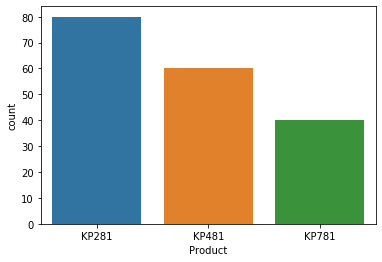

In [30]:
#Product,Gender,Martial Status are categorical 
sns.countplot(x = df['Product'])

-- <b> KP281 </b> is the most commonly purchased Product type

-- <b> KP481 </b> is the second most commonly purchased Product Type

-- <b> KP781 </b> is the least commonly purchased Product Type

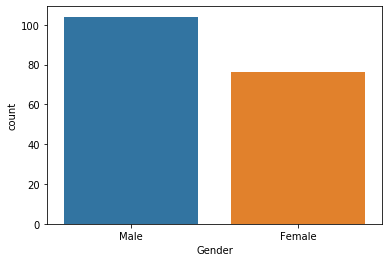

In [31]:
#Gender
sns.countplot(x = df['Gender'])

* Most Product are purchased by Male customers

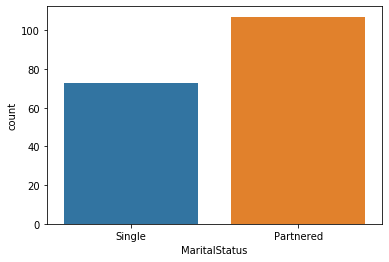

In [32]:
sns.countplot(x = df['MaritalStatus'])

* Most Product are purchased by <b> Married/Partnered </b>

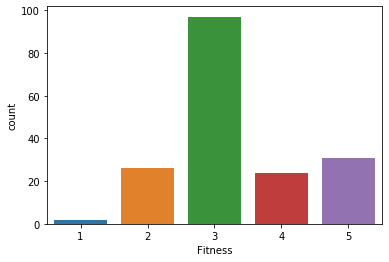

In [33]:
sns.countplot(x = df['Fitness'])

* Most of customer are given <b> average rating </b>

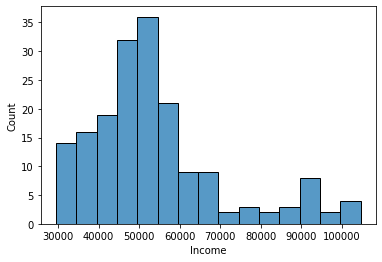

In [34]:
# Income Analysis - Histogram
sns.histplot(data=df,x='Income')

* more than 35 customer earns 50-60k.

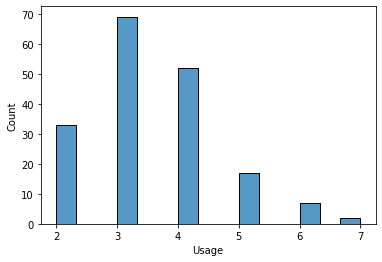

In [35]:
# Usage Analysis - Histogram
sns.histplot(data=df,x='Usage')

* 3 days per week is the most common usage among the customers
* 4 days and 2 days per week is the second and third highest usage among the customers
* Very few customers use product 7 days per week

[Text(0.5, 1.0, 'Income')]

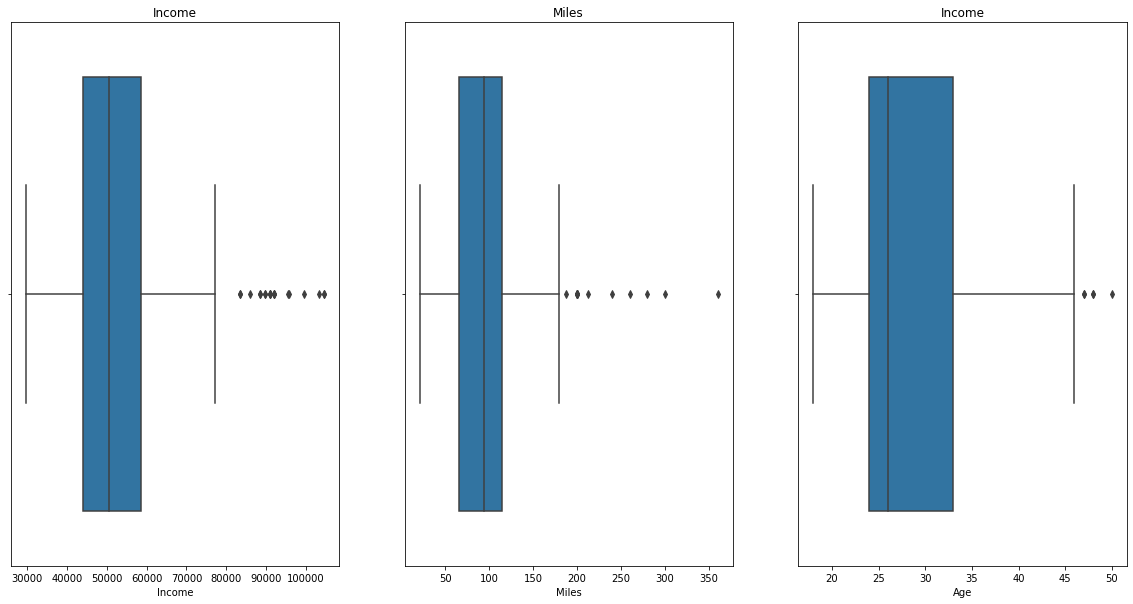

In [36]:
#Box plot
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.boxplot(data=df,x=df['Income']).set(title='Income')

plt.subplot(1,3,2)
sns.boxplot(data=df,x=df['Miles']).set(title='Miles')

plt.subplot(1,3,3)
sns.boxplot(data=df,x=df['Age']).set(title='Income')

In [37]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


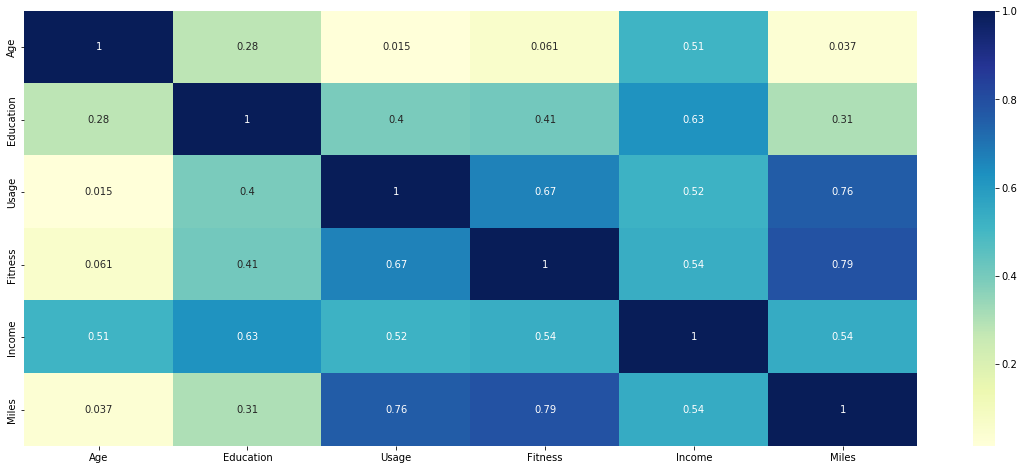

In [38]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

* correlation of Age and Income is 0.51
* correlation of Education and Income is 0.63
* correlation of Usage and Miles is 0.76
* correlation of Fitness and Miles is 0.79
* correlation of Income and Fitness is 0.54
* correlation of Miles and Age is 0.03
* correlation of Age and Usage is 0.015

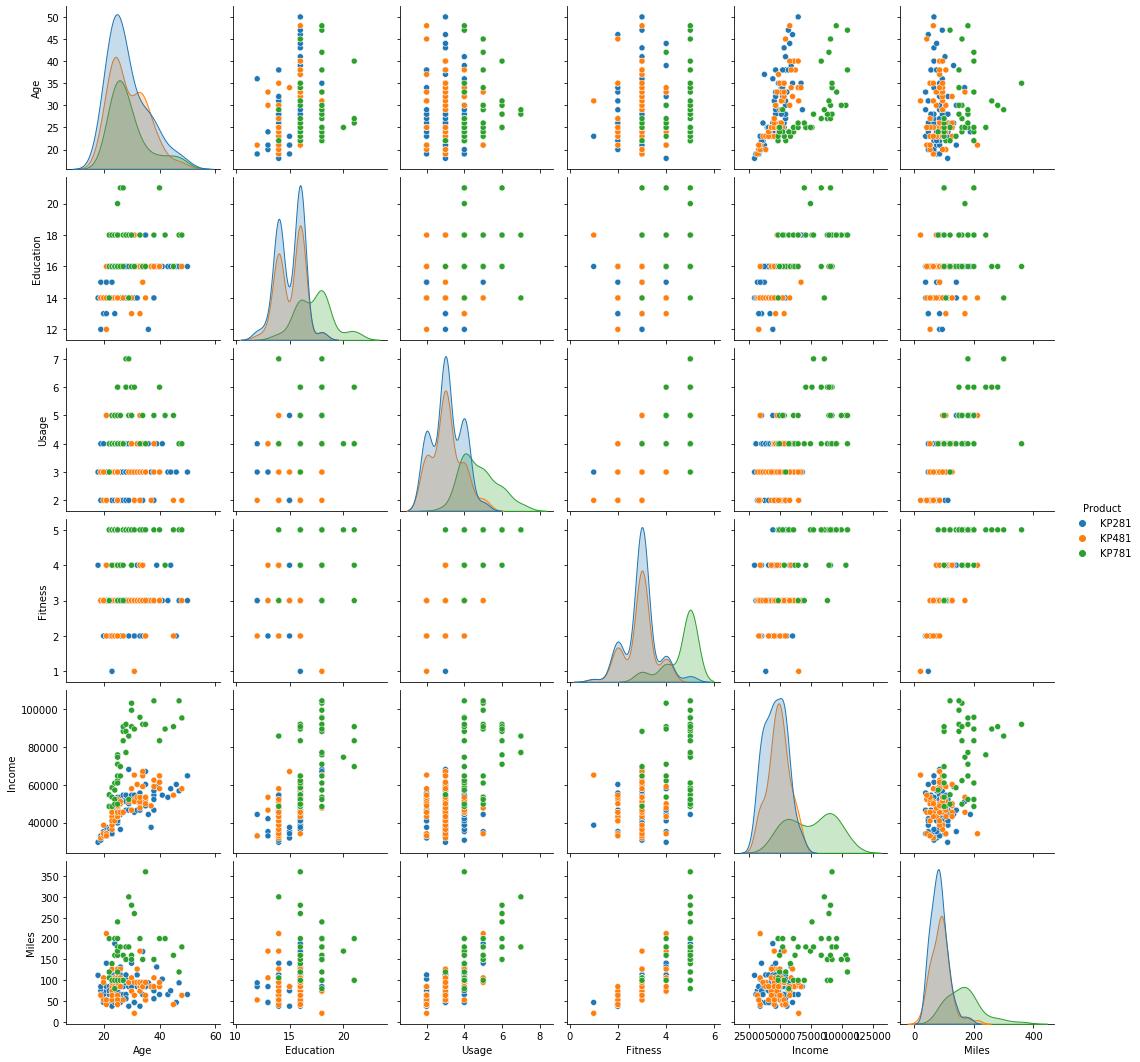

In [39]:
sns.pairplot(df, hue ='Product')

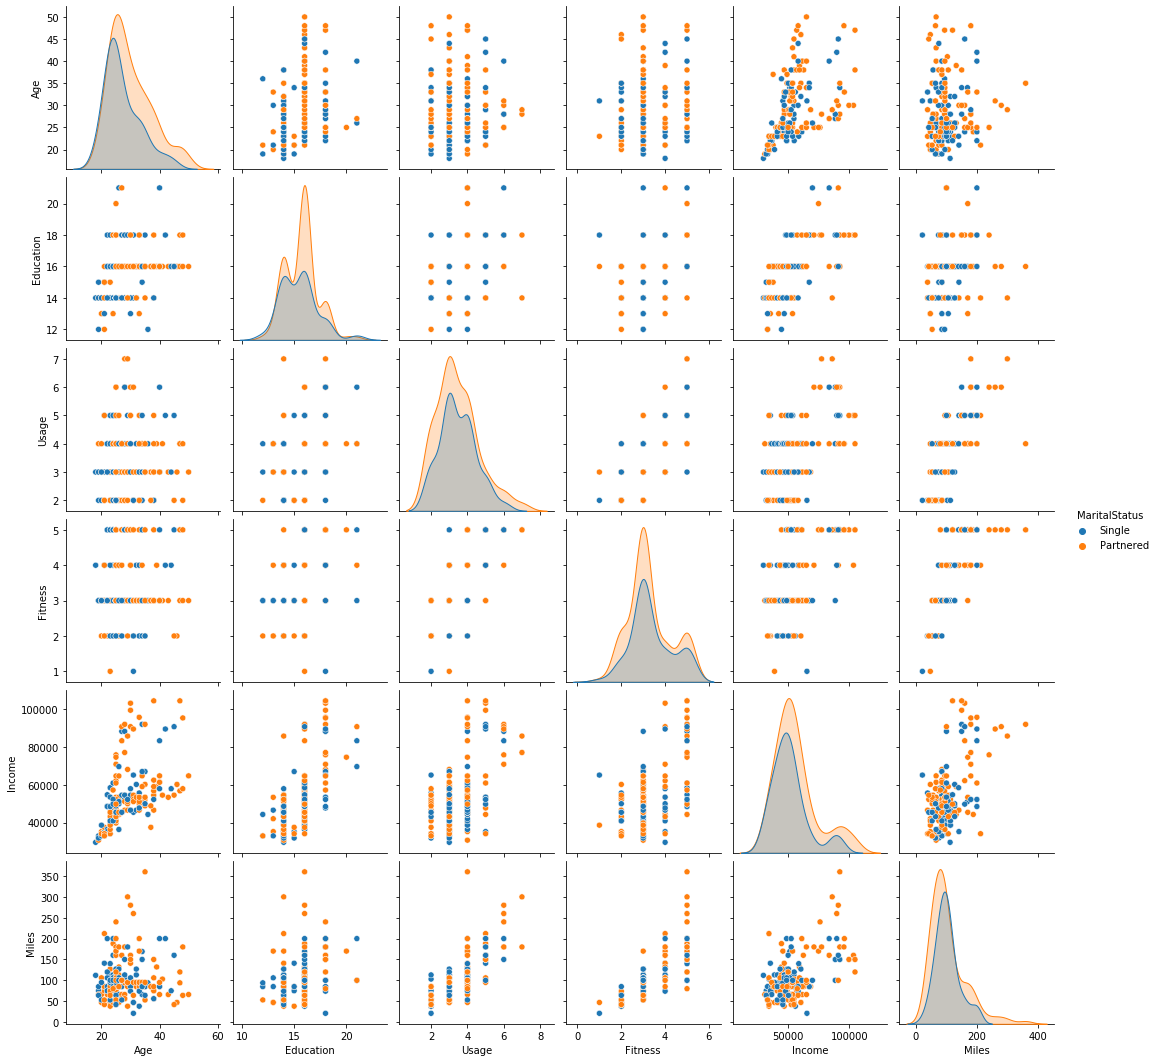

In [40]:
sns.pairplot(df, hue ='MaritalStatus')

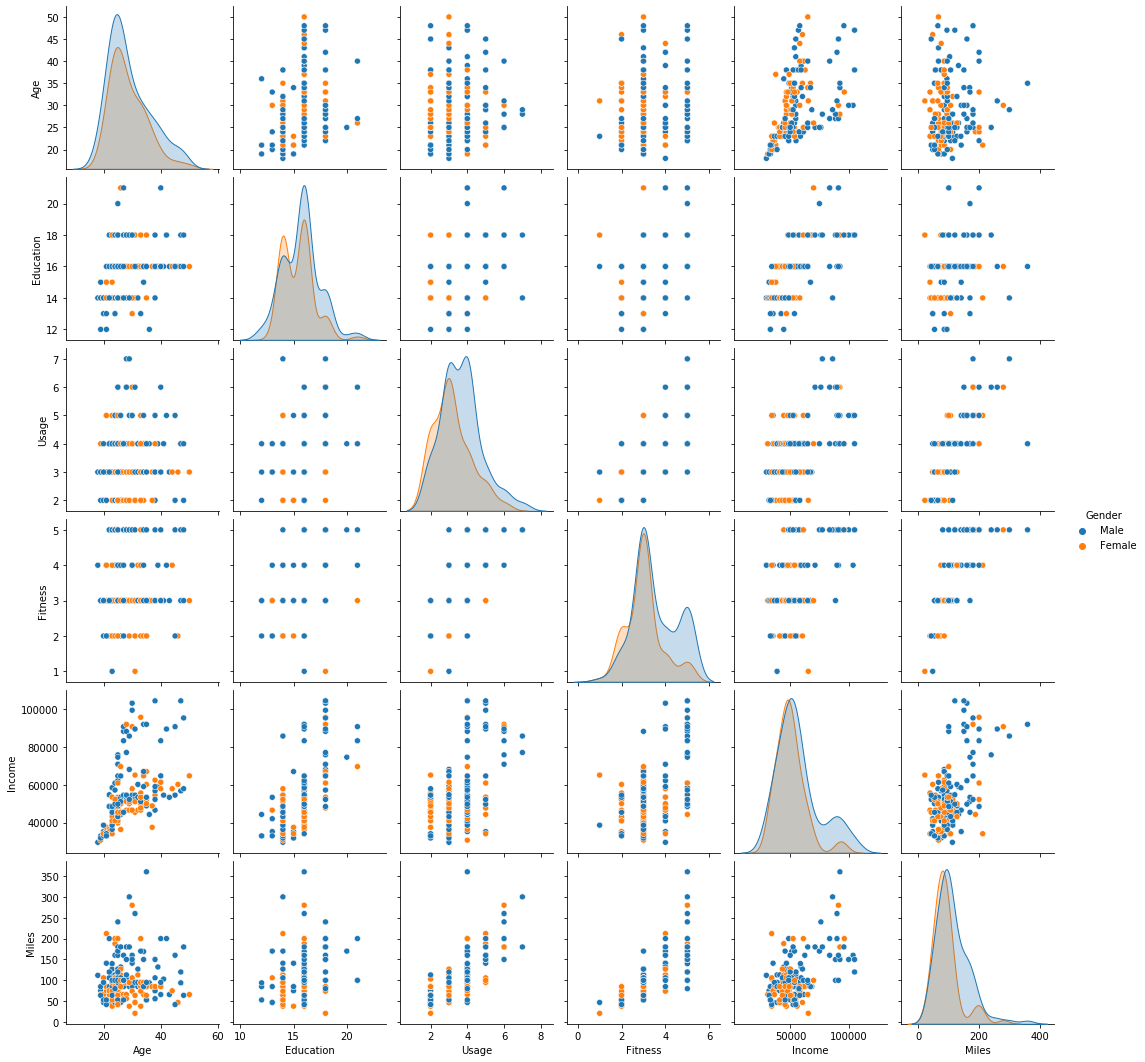

In [41]:
sns.pairplot(df, hue ='Gender')

#### Bivariant

In [42]:
#Average Usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

* Mean usage of <b> KP281 </b> product is 3.08
* Mean usage of <b> KP481 </b> product is 3.06
* Mean usage of <b> KP781 </b> product is 4.77

In [43]:
#Average Age of customer to each Product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

* Mean Age of purchasing KP281 product is 28.55
* Mean Age of purchasing KP481 product is 28.90
* Mean Age of purchasing KP781 product is 29.10

In [44]:
#Average Education of customer to each Product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64

* Mean Education of purchasing KP281 product is 15.03
* Mean Education of purchasing KP481 product is 15.11
* Mean Education of purchasing KP781 product is 17.32

In [45]:
#Average Fitness review of customer to each product
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

* Mean Fitness review rating of KP281 product is 2.96
* Mean Fitness review rating of KP481 product is 2.90
* Mean Fitness review rating of KP781 product is 4.62

In [46]:
#Average Usage of customer to each product
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

* Average Usage of KP281 product is 3.08
* Average Usage of KP481 product is 3.06
* Average Usage of KP781 product is 4.77

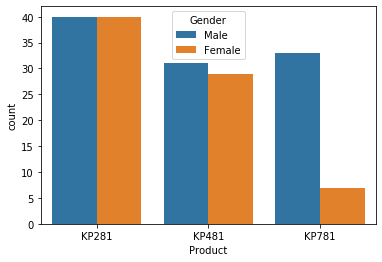

In [47]:

sns.countplot(data=df, x= 'Product',hue='Gender')

* KP281 product was equally preferred by Male and Female
* KP781 Product are mostly preffered by Male customer
* Overall Male customer are Purchased higher number of Product

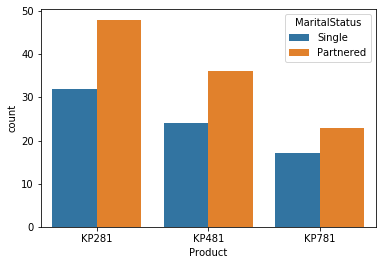

In [48]:
sns.countplot(data=df, x= 'Product',hue='MaritalStatus')

* Overall Partnered/Married customer are purchased higher number of product
* KP281 Product is mostly preffered by Partnered/Married customer

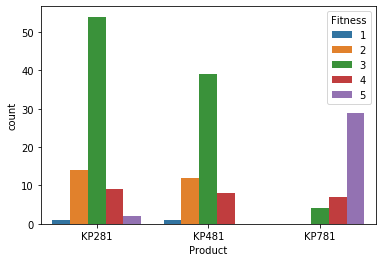

In [49]:
sns.countplot(data=df, x= 'Product',hue='Fitness')

* Overall Average rating is 3
* KP781 has strongly recommend Product 

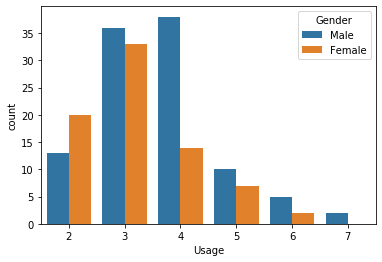

In [50]:

sns.countplot(data=df, x= 'Usage',hue='Gender')

* Among Male and Female customer, Male customer usage is 4 days/week
* Female customer usage is 3 days/week


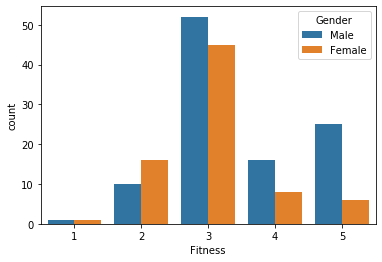

In [51]:
#plt.figure(figsize=(20,10))
sns.countplot(data=df, x= 'Fitness',hue='Gender')

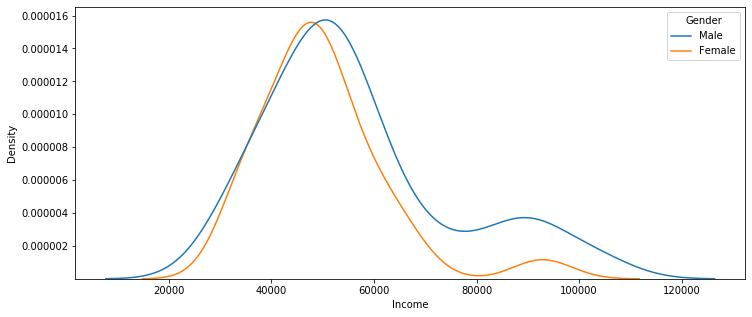

In [52]:
# Product purchased Customers Income and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Income',hue='Gender')
plt.show()

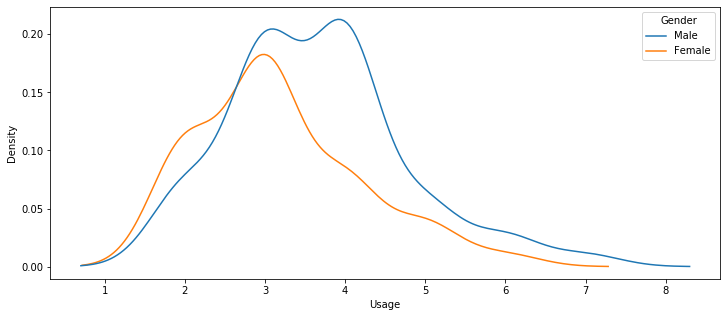

In [53]:
# Product purchased Customers Usage per week and their Gender
plt.figure(figsize=(12,5))
sns.kdeplot(data=df,x='Usage',hue='Gender')
plt.show()

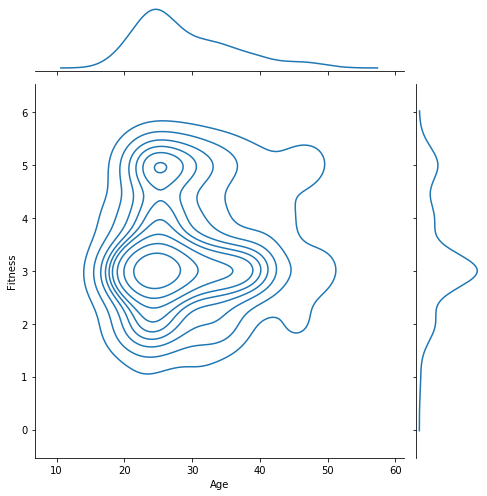

In [54]:
# Joint Histogram with KDE plot
sns.jointplot(x="Age", y="Fitness", data=df,height = 7,kind="kde")
plt.show()

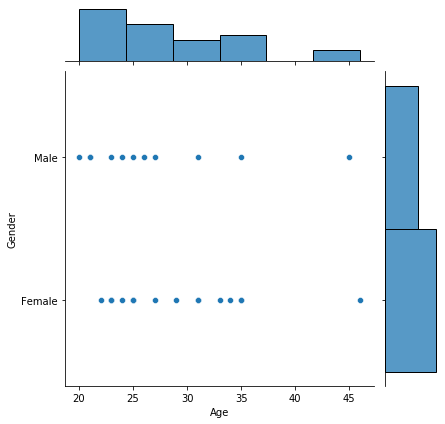

In [55]:
# Scatterplot for customers Gender and Age who rated less than 2 in Fitness rating
sns.jointplot(x='Age',y='Gender',data=df[df.Fitness<3])
plt.show()

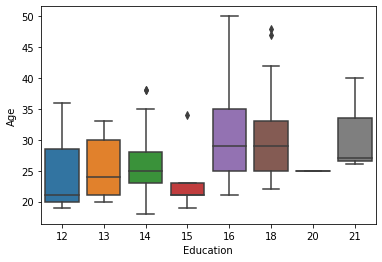

In [56]:
sns.boxplot(x='Education',y='Age',data=df)

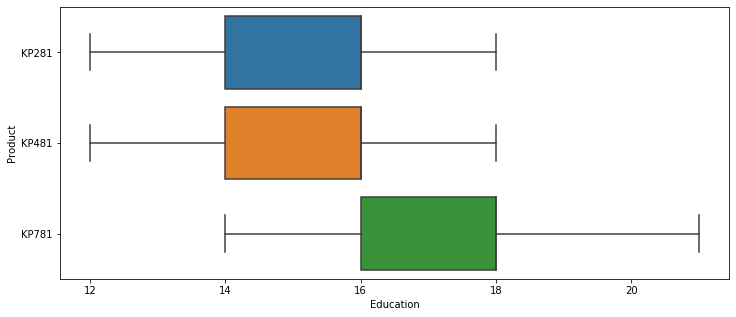

In [57]:
# Education of customers with each product purchased
plt.figure(figsize=(12,5))
sns.boxplot(x='Education',y='Product',data=df)
plt.show()

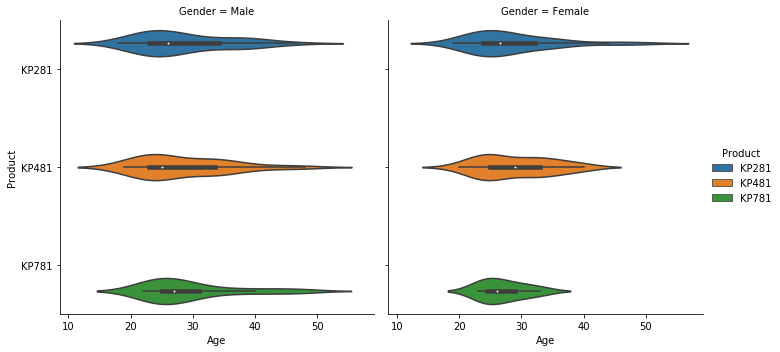

In [58]:
# Product used among age group seggregated by Gender
sns.catplot(x='Age',y='Product',hue='Product',col='Gender',data=df,kind='violin')
plt.show()

### Missing value and Outliers

In [59]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
Fitness_cat      0
Income group     0
dtype: int64

* There is no null value in the given dataset

In [60]:
df.duplicated().sum()

0

### outlier detection

In [61]:
data = df['Income'].tolist()
threshold = 3
mean = np.mean(data)
std = np.std(data)

z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print (z_score_outlier)

[103336, 104581, 104581]


In [62]:
data = df['Miles'].tolist()
threshold = 3
mean = np.mean(data)
std = np.std(data)

z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print (z_score_outlier)

[300, 280, 260, 360]


In [63]:
data = df['Age'].tolist()
threshold = 3
mean = np.mean(data)
std = np.std(data)

z_score_outlier = [i for i in data if (i-mean)/std > threshold]
print (z_score_outlier)

[50]


### Business Insights based on Non-Graphical and Visual Analysis

In [64]:
df.Product.value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Probability of buying <b> KP281,KP481,KP781 </b> are 0.44,0.33,0.22

In [65]:
df.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

* Probability of Male customer is <b> 0.57 </b>
* Probability of Female customer is <b> 0.42 </b>

In [66]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

* Probability of Partnered is 0.59
* Probability of Single is 0.40

#### Probability for each product for the both genders

In [67]:
def gender_prob(gender,df):
    print(f"Prob P(KP281) for {gender}: {round(df['KP281'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP481) for {gender}: {round(df['KP481'][gender]/df.loc[gender].sum(),3)}")
    print(f"Prob P(KP781) for {gender}: {round(df['KP781'][gender]/df.loc[gender].sum(),3)}")

In [68]:
df_temp = pd.crosstab(index = df['Gender'],columns= df['Product'])
print(df_temp)

Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33


In [69]:
print("Prob of Male: ",round(df_temp.loc['Male'].sum()/len(df),3))
print("Prob of Female: ",round(df_temp.loc['Female'].sum()/len(df),3))

gender_prob('Male',df_temp)
print()
gender_prob("Female",df_temp)

Prob of Male:  0.578
Prob of Female:  0.422
Prob P(KP281) for Male: 0.385
Prob P(KP481) for Male: 0.298
Prob P(KP781) for Male: 0.317

Prob P(KP281) for Female: 0.526
Prob P(KP481) for Female: 0.382
Prob P(KP781) for Female: 0.092


#### Probability for each product for the MaritalStatus

In [70]:
def marital_prob(marital,df):
    print(f"Prob P(KP281) for {marital}: {round(df['KP281'][marital]/df.loc[marital].sum(),3)}")
    print(f"Prob P(KP481) for {marital}: {round(df['KP481'][marital]/df.loc[marital].sum(),3)}")
    print(f"Prob P(KP781) for {marital}: {round(df['KP781'][marital]/df.loc[marital].sum(),3)}")

In [71]:
df_temp = pd.crosstab(index = df['MaritalStatus'],columns= df['Product'])
print(df_temp)

Product        KP281  KP481  KP781
MaritalStatus                     
Partnered         48     36     23
Single            32     24     17


In [72]:
print("Prob of Single: ",round(df_temp.loc['Single'].sum()/len(df),3))
print("Prob of Partnered: ",round(df_temp.loc['Partnered'].sum()/len(df),3))

marital_prob('Single',df_temp)
print()
marital_prob("Partnered",df_temp)

Prob of Single:  0.406
Prob of Partnered:  0.594
Prob P(KP281) for Single: 0.438
Prob P(KP481) for Single: 0.329
Prob P(KP781) for Single: 0.233

Prob P(KP281) for Partnered: 0.449
Prob P(KP481) for Partnered: 0.336
Prob P(KP781) for Partnered: 0.215


#### Customer Age group Analysis

In [73]:
df_cat['age_group'] = df_cat.Age
df_cat.age_group = pd.cut(df.age_group,bins=[0,21,35,45,60],labels=['Teen','Adult','Middle Aged','Elder'])
df_cat.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness_cat,Income group,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Good Shape,Low class,Teen
1,KP281,19,Male,15,Single,2,3,31836,75,Average Shape,Low class,Teen
2,KP281,19,Female,14,Partnered,4,3,30699,66,Average Shape,Low class,Teen
3,KP281,19,Male,12,Single,3,3,32973,85,Average Shape,Low class,Teen
4,KP281,20,Male,13,Partnered,4,2,35247,47,Bad Shape,Low class,Teen


* 0-21 -> Teen
* 22-35 -> Adult
* 36-45 -> Middle Age
* 46-60 -> Elder Age

In [74]:
df_cat.age_group.value_counts()

Adult          135
Middle Aged     22
Teen            17
Elder            6
Name: age_group, dtype: int64

In [75]:
df_cat.loc[df_cat.Product=='KP281']['age_group'].value_counts()

Adult          56
Middle Aged    11
Teen           10
Elder           3
Name: age_group, dtype: int64

In [76]:
df_cat.loc[df_cat.Product=='KP481']['age_group'].value_counts()

Adult          45
Middle Aged     7
Teen            7
Elder           1
Name: age_group, dtype: int64

In [77]:
df_cat.loc[df_cat.Product=='KP781']['age_group'].value_counts()

Adult          34
Middle Aged     4
Elder           2
Teen            0
Name: age_group, dtype: int64

In [78]:
pd.crosstab(index=df_cat.Product,columns=df_cat.age_group,margins=True)

age_group,Teen,Adult,Middle Aged,Elder,All
Product,,,,,
KP281,10,56,11,3,80
KP481,7,45,7,1,60
KP781,0,34,4,2,40
All,17,135,22,6,180


In [79]:
pd.crosstab(index=df_cat.Product,columns=df_cat.Fitness_cat,margins=True)

Fitness_cat,Average Shape,Bad Shape,Excellent Shape,Good Shape,Poor Shape,All
Product,,,,,,
KP281,54,14,2,9,1,80
KP481,39,12,0,8,1,60
KP781,4,0,29,7,0,40
All,97,26,31,24,2,180


In [80]:
pd.crosstab(index=df_cat.Product,columns=df_cat['Income group'],margins=True)

Income group,Low class,Lower Middle class,Upper Middle class,Upper class,All
Product,,,,,
KP281,48,32,0,0,80
KP481,30,30,0,0,60
KP781,5,12,11,12,40
All,83,74,11,12,180


In [81]:
pd.crosstab(index=[df_cat.Product,df_cat.Fitness_cat],columns=df_cat.Gender)

Gender                   Female  Male
Product Fitness_cat                  
KP281   Average Shape        26    28
        Bad Shape            10     4
        Excellent Shape       1     1
        Good Shape            3     6
        Poor Shape            0     1
KP481   Average Shape        18    21
        Bad Shape             6     6
        Good Shape            4     4
        Poor Shape            1     0
KP781   Average Shape         1     3
        Excellent Shape       5    24
        Good Shape            1     6

In [82]:
round(pd.crosstab(index=[df_cat.Product,df_cat.Fitness_cat],columns=df_cat.Gender,normalize=True)*100,2)

Gender                   Female   Male
Product Fitness_cat                   
KP281   Average Shape     14.44  15.56
        Bad Shape          5.56   2.22
        Excellent Shape    0.56   0.56
        Good Shape         1.67   3.33
        Poor Shape         0.00   0.56
KP481   Average Shape     10.00  11.67
        Bad Shape          3.33   3.33
        Good Shape         2.22   2.22
        Poor Shape         0.56   0.00
KP781   Average Shape      0.56   1.67
        Excellent Shape    2.78  13.33
        Good Shape         0.56   3.33

In [83]:
round(pd.crosstab(index=[df_cat.Product,df_cat.MaritalStatus],columns=df_cat.Gender,normalize=True),2)

Gender                 Female  Male
Product MaritalStatus              
KP281   Partnered        0.15  0.12
        Single           0.07  0.11
KP481   Partnered        0.08  0.12
        Single           0.08  0.06
KP781   Partnered        0.02  0.11
        Single           0.02  0.08

In [84]:
round(((pd.crosstab(df.Product,df.Gender,margins=True))/180)*100,2)

Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


##### Marginal Probability

* Probability of Male customer Purchasing any product is 57.78%
* Probability of Female customer Purchasing any Product is 42.22%

##### Marginal Probability of any customer buying

* Product KP281 is: 44.44 % (cheaper/entry level)
* Product KP481 is: 33.33 % (Intermediate level)
* Product KP781 is: 22.22 % (Advance level)

In [85]:
np.round((pd.crosstab([df.Product],df.Gender,margins=True,normalize="columns"))*100,2)

Gender,Female,Male,All
Product,,,
KP281,52.63,38.46,44.44
KP481,38.16,29.81,33.33
KP781,9.21,31.73,22.22


**Probability of Selling Product**

KP281 | Female = 52 %

KP481 | Female = 38 %

KP781 | Female = 10 %

KP281 | male = 38 %

KP481 | male = 30 %

KP781 | male = 32 %

Probability of Female customer buying KP281(52.63%) is more than male(38.46%).

KP281 is more recommended for female customers.

Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).

Probability of Female customer buying Product KP481(38.15%) is significantly higher than male (29.80%. )

KP481 product is specifically recommended for Female customers who are intermediate user.

### Recommendation

KP781 has more features and functionality, threadmill should recommend for professionals and athletes

Provide customer support and recommend users to upgrade from lower versions to next level versions after consistent usages.

KP281 & KP481 treadmills are preferred by the customers whose annual income lies in the range of Low class and Upper middle class customer. These models should promoted as budget treadmills.

Research required for expanding market beyond 50 years of age considering health pros and cons